# DBSCAN (crimedataset)

In [344]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [345]:
df=pd.read_csv('crime_data.csv',index_col=0)

In [346]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [347]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler().fit(df)
X=scalar.transform(df)

In [348]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [349]:
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=8)
nbrs=neigh.fit(data)

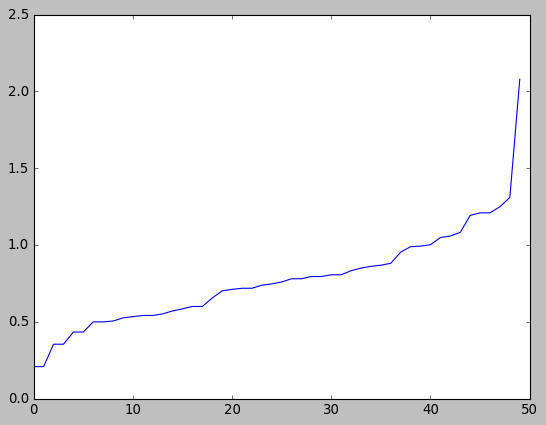

In [350]:
distances,indices=nbrs.kneighbors(data)
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)

In [351]:
dbscan=DBSCAN(eps=1.275,min_samples=5)
dbscan.fit(data)

DBSCAN(eps=1.275)

In [352]:
dbscan.labels_

array([ 0, -1,  1,  0, -1,  1,  0,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  1,  0,  1,  0, -1,  0,  0,  0,  1,  0,  0,  1,  1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [353]:
c1=pd.DataFrame(dbscan.labels_,columns=['clust'])
c1

,clust
0,0
1,-1
2,1
3,0
4,-1
5,1
6,0
7,0
8,-1
9,0


In [354]:
df1=pd.concat([data,c1],axis=1)

In [355]:
df1

,0,1,2,3,clust
0,1.255179,0.790787,-0.526195,-0.003451,0
1,0.513019,1.118060,-1.224067,2.509424,-1
2,0.072361,1.493817,1.009122,1.053466,1
3,0.234708,0.233212,-1.084492,-0.186794,0
4,0.281093,1.275635,1.776781,2.088814,-1
5,0.025976,0.402909,0.869548,1.883901,1
6,-1.040880,-0.736484,0.799761,-1.092723,0
7,-0.437875,0.815030,0.450825,-0.585834,0
8,1.765415,1.990786,1.009122,1.150530,-1
9,2.229265,0.487757,-0.386621,0.492653,0


In [356]:
import sklearn
sklearn.metrics.silhouette_score(df1,c1)

C:\Users\RAMA KRISHNA\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2980723349571052

# DBSCAN (EASTWESTAIRLINES)

In [357]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [358]:
df=pd.read_excel('EastWestAirlines (1).xlsx',sheet_name='data')

In [359]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [360]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler().fit(df)
X=scalar.transform(df)

In [361]:
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [362]:
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=24)
nbrs=neigh.fit(data)

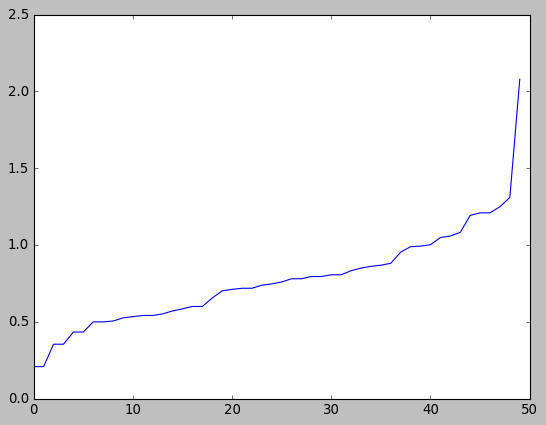

In [363]:
distances,indices=nbrs.kneighbors(data)
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)

In [364]:
dbscan=DBSCAN(eps=1.275,min_samples=5)
dbscan.fit(data)

DBSCAN(eps=1.275)

In [365]:
dbscan.labels_

array([ 0, -1,  1,  0, -1,  1,  0,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  1,  0,  1,  0, -1,  0,  0,  0,  1,  0,  0,  1,  1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [366]:
c1=pd.DataFrame(dbscan.labels_,columns=['clust'])
c1

,clust
0,0
1,-1
2,1
3,0
4,-1
5,1
6,0
7,0
8,-1
9,0


In [367]:
df1=pd.concat([data,c1],axis=1)
df1

,0,1,2,3,clust
0,1.255179,0.790787,-0.526195,-0.003451,0
1,0.513019,1.118060,-1.224067,2.509424,-1
2,0.072361,1.493817,1.009122,1.053466,1
3,0.234708,0.233212,-1.084492,-0.186794,0
4,0.281093,1.275635,1.776781,2.088814,-1
5,0.025976,0.402909,0.869548,1.883901,1
6,-1.040880,-0.736484,0.799761,-1.092723,0
7,-0.437875,0.815030,0.450825,-0.585834,0
8,1.765415,1.990786,1.009122,1.150530,-1
9,2.229265,0.487757,-0.386621,0.492653,0
